In [4]:
from ete3 import Tree, TreeStyle, NodeStyle
t = Tree('../output_itai/01_70p_tree/RaxML/RAxML_bipartitions.result',format=2)
t.set_outgroup(t.get_leaves_by_name('RBG_13_scaffold_9498_7')[0])

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -120 # 0 degrees = 3 o'clock
ts.arc_span = 360
ts.branch_vertical_margin = 1
#t.show(tree_style=ts)

In [185]:
! mkdir -p ../output_itai/02_90p_tree
!../bin/usearch11.0.667_i86linux32 -cluster_fast ../output_itai/00_100p_tree/uclust_all_1.faa -id 0.9 -uc ../output_itai/02_90p_tree/uclust_all_0.9.uc

The syntax of the command is incorrect.
'..' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
parse_uclust(infile='../output_itai/02_90p_tree/uclust_all_0.9.uc',
             fasta='../output_itai/00_100p_tree/uclust_all_1.faa',
             outfasta='../output_itai/02_90p_tree/uclust_all_0.9.faa',
             outfile='../output_itai/02_90p_tree/uclust_all_0.9.csv'
            )

Text(0.5, 0, 'y')

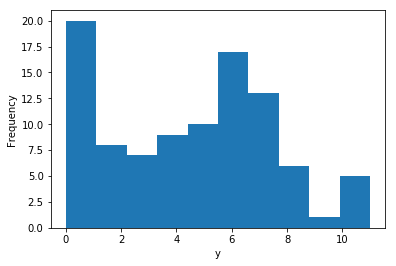

In [32]:
import hvplot.pandas
%matplotlib inline
l = pd.read_csv('../../../../RO/3PG Coupled Assay/EPPS_Assays/agg_variant_data_42_83_20190529.csv')
l['mean kcat'].hvplot.hist(bins=20)
#hvplot.save(o,filename='../../../../RO/3PG Coupled Assay/EPPS_Assays/mean_kcat_hist.svg',fig='svg')
#import matplotlib.pyplot as plt
#l.hvplot.
#bar(x='Variant',y='mean kcat',yerr=l['kcat std'])

ax = l['mean relative to Rr'].plot.hist()


In [89]:
import pandas as pd

kinetic_data = pd.read_csv('../output_itai/00_100p_tree/uclust_all_1_kinetic_data.csv',names=['kinetic_ID'])
uc = pd.read_csv('../output_itai/01_70p_tree/uclust_all_0.7.csv')
uc = pd.read_csv('../output_itai/01_70p_tree/uclust_all_0.7.csv')
uc2 = uc.merge(kinetic_data,left_on='Query', right_on='kinetic_ID')
uc2['kinetic_flag'] = '-1'
uc2.loc[~uc2.kinetic_ID.isna(),'kinetic_flag'] = '1'
#lines = uc2['Target'].apply(lambda x: x.split(' ')[0]).values + ','+ uc2['kinetic_flag'].values+',-1\n'
#unique_lines = np.unique(lines)
uc2['ID'] = uc2['Target'].apply(lambda x: x.split(' ')[0])
uc['ID'] = uc['Target'].apply(lambda x: x.split(' ')[0])
all_leaves = uc.groupby('ID')['Type'].count()

In [184]:
uc_all = uc.merge(uc90,left_on='Query',right_on='Query',suffixes=('_70','_90'))
uc_all['ID'] = uc_all['Target_70'].apply(lambda x: x.split(' ')[0])
all_leaves = uc_all.groupby('ID')['Target_90'].nunique()

162

In [6]:
import matplotlib as mp
from matplotlib import cm
ncol = 256
mg = cm.get_cmap('magma',lut=ncol)


In [7]:
x = 0
for leaf in t.traverse():
    if leaf.name == '':
        leaf.name = 'Int'+str(x)
        x = x+1
f = pd.DataFrame(pd.np.arange(0,257))
f['c'] = [mp.colors.to_hex(mg(x)) for x in f[0]]
#f.columns = ['x','c']
f.plot.scatter(x=0,y=0,c=f['c'])

mp.colors.to_hex(mg(3))

'#010108'

In [86]:
measurements = uc2.groupby('ID')['kinetic_flag'].count()
lines = []
max_frac = 0.0077191602340331384
m = 2.19
for leaf in t.traverse():
    leaf.add_feature('num_measured',sum([measurements.loc[x.name] for x in leaf.get_leaves() if x.name in measurements.index]))
    leaf.add_feature('all_leaves',sum([all_leaves.loc[x.name] for x in leaf.get_leaves() if x.name in all_leaves.index]))

for leaf in t.traverse():    
    #mean_measured = pd.Series([measurements.loc[x.name] for x in leaf.get_leaves() if x.name in measurements.index]).mean()
    #leaf.add_feature('mean_measured',pd.np.nanmax([mean_measured,0]))
    leaf.add_feature('mean_measured',pd.Series([x.num_measured for x in leaf.get_leaves() ]).mean())
    #leaf.add_feature('frac_measured',leaf.num_measured/leaf.all_leaves)
    #leaf.line_width = 1+leaf.frac_measured/max_frac*4
    leaf.add_feature('col_scale',pd.np.max([(pd.np.log10(leaf.mean_measured)/m*154+100),0]))
    leaf.line_width = 1+leaf.col_scale/256*4
    #leaf.line_width = 1 + pd.np.log10(leaf.num_measured+1)/m*4
    
    #line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(int(leaf.frac_measured/max_frac*ncol)), keep_alpha=False) + ' normal '+str(int(leaf.line_width))+'\n'
    #line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(int(pd.np.log10(leaf.num_measured+1)/m*256)), keep_alpha=False) + ' normal '+str(int(leaf.line_width))+'\n'
    #line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(int(pd.np.log10(leaf.mean_measured+1)/m*256)), keep_alpha=False) + ' normal '+str(int(leaf.line_width))+'\n'
    line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(int(leaf.col_scale)), keep_alpha=False) + ' normal '+str(int(leaf.line_width))+'\n'
    #line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(int(leaf.mean_measured)), keep_alpha=False) + ' normal '+str(int(leaf.line_width))+'\n'
    lines.append(line)
    #ns = NodeStyle()
    #ns["fgcolor"] = mp.colors.to_hex(mg(leaf.frac_measured*256), keep_alpha=False) 
    #print(ns['fgcolor'])
    #leaf.img_style = ns

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


In [60]:
pd.np.max([x.col_scale for x in t.traverse()])

255.6842519232627

In [33]:
#lines

In [70]:
[x for x in lines if 'gi|518331021|ref|WP_019501228.1| ' in x]
[x for x in t.traverse() if x.name == 'RBCSeed_14'][0].col_scale
mp.colors.to_hex(mg(int(100)), keep_alpha=False)

'#892881'

In [87]:
n = [x for x in t.traverse() if x.name == 'Int492'][0]
pd.Series([measurements.loc[x.name] for x in n.get_leaves() if x.name in measurements.index])
n.mean_measured
#[x.mean_measured for x in [x for x in t.traverse() if x.name == 'Int492'][0].get_leaves()]

0.3333333333333333

In [53]:
pd.np.log10([x for x in t.traverse() if x.name == 'gi|518331021|ref|WP_019501228.1|'][0].mean_measured)


2.1958996524092336

In [257]:
#measurements.loc[[x.name for x in [x for x in t.traverse() if x.name == 'I85'][0].get_leaves()]]
#mp.colors.to_hex(mg([x for x in t.traverse() if x.name == 'Int29'][0].frac_measured*256))
mp.colors.to_hex(mg(pd.np.floor([x for x in t.traverse() if x.name == 'Int29'][0].frac_measured*256)))
#mp.colors.to_hex(mg(3.65))
#[x for x in t.traverse() if x.name == 'Int29'][0].frac_measured*256
#mg(3.65)
#mp.colors.to_hex(mg(int([x for x in t.traverse() if x.name == 'Int29'][0].frac_measured*256)))
int([x for x in t.traverse() if x.name == 'gi|518331021|ref|WP_019501228.1|'][0].frac_measured/max_frac*256)
l = [x for x in t.traverse() if x.name == 'Int11'][0]
[[x.name,x.num_measured] for x in l.get_leaves()]


[['PH2015_07_scaffold_0_448_PHAGE', 0],
 ['TARA_039.SAMEA2620106.270.0.1-0.22_4721_4', 0],
 ['TARA_042.SAMEA2620230.5.0.22-1.6_957446_9', 0],
 ['TARA_052.SAMEA2620542.5.0.22-1.6_2455572_5', 0],
 ['imgVR_3300012953_Ga0163179_10002555_5_PHAGE', 0],
 ['TARA_042.SAMEA2620230.5.0.22-1.6_61010_2', 0],
 ['TARA_009.SAMEA2619548.55.0.22-1.6_578978_3', 0],
 ['imgVR_3300000117_DelMOWin2010_c10001624_5_PHAGE', 0],
 ['TARA_048.SAMEA2620404.5.0.22-1.6_2468987_1', 0],
 ['TARA_039.SAMEA2620081.25.0.22-1.6_1488684_5', 0],
 ['imgVR_3300006484_Ga0070744_10000432_2_PHAGE', 0],
 ['imgVR_3300009164_Ga0114975_10000049_44_PHAGE', 0],
 ['imgVR_3300002835_B570J40625_100002082_7_PHAGE', 0],
 ['TARA_152.SAMEA2623919.25.0.22-3_2692249_4', 0],
 ['rifcsphigho2_12_scaffold_162_94_PHAGE', 0],
 ['imgVR_3300013093_Ga0164296_1006299_14_PHAGE', 0],
 ['imgVR_3300006129_Ga0007834_1000020_33_PHAGE', 0],
 ['imgVR_3300000439_TBL_comb48_EPIDRAFT_1000912_4_PHAGE', 0],
 ['imgVR_3300000553_TBL_comb47_HYPODRAFT_10006500_13_PHAGE', 

In [ ]:
for leaf in t.traverse():
    leaf.add_feature('frac_measured',sum([measurements.loc[x.name] for x in leaf.get_leaves() if x.name in measurements.index]))
    line = leaf.name + ' ' + 'branch ' + mp.colors.to_hex(mg(leaf.frac_measured*256), keep_alpha=False) + ' normal ' + 5 +'\n'
    lines.append(line)
#pd.Series([x.name for x in t.get_leaves()]).isin(uc2.ID)

In [88]:
with open('../data/colors_styles_template.txt','r') as file:
    with open('../output_itai/01_70p_tree/kinetic_branch_colors.txt', "w") as f1:
        for row in file:
            f1.write(row)
        for line in lines:
            f1.write(line)
        file.close()
        f1.close()

In [ ]:

ts = TreeStyle()
ts.mode = "c"
ts.arc_start = -120 # 0 degrees = 3 o'clock
ts.arc_span = 360
t.show(tree_style=ts)


In [68]:

t

Tree node 'I0' (-0x7fffffe0654290af)

In [263]:
t.write(format=1, outfile="../output_itai/01_70p_tree/new_tree.nw")

In [34]:
mg = cm.get_cmap('magma',lut=1)
#mg = cm.get_cmap('magma')
[256*x for x in mg(1)]


ns = NodeStyle()
    ns["fgcolor"] = colors[l.name]
    l.img_style = ns

[0.578048, 0.33152, 4.692736, 256.0]

In [43]:
t = Tree('/home/yinonbaron/Downloads/40nFYGu0DZaYY90hWZr4mA_newick.txt',format=2)

NewickError: Unexpected newick format ':0.01204999099537009018[28]' 
You may want to check other newick loading flags like 'format' or 'quoted_node_names'.